https://docs.pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html

PyTorch’s Autograd feature is part of what make PyTorch flexible and fast for building machine learning projects. It allows for the rapid and easy computation of multiple partial derivatives (also referred to as gradients) over a complex computation. This operation is central to backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your computation dynamically at runtime, meaning that if your model has decision branches, or loops whose lengths are not known until runtime, the computation will still be traced correctly, and you’ll get correct gradients to drive learning. This, combined with the fact that your models are built in Python, offers far more flexibility than frameworks that rely on static analysis of a more rigidly-structured model for computing gradients.

In [2]:
import torch

x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

print(x)
print(y)

z = x**2 + 3*x*y + 2*y   # f(x,y) = x² + 3xy + 2y
z.backward()             # computes ∂z/∂x and ∂z/∂y

print(x.grad)  # -> tensor(8.)
print(y.grad)  # -> tensor(5.)

tensor(1., requires_grad=True)
tensor(2., requires_grad=True)
tensor(8.)
tensor(5.)


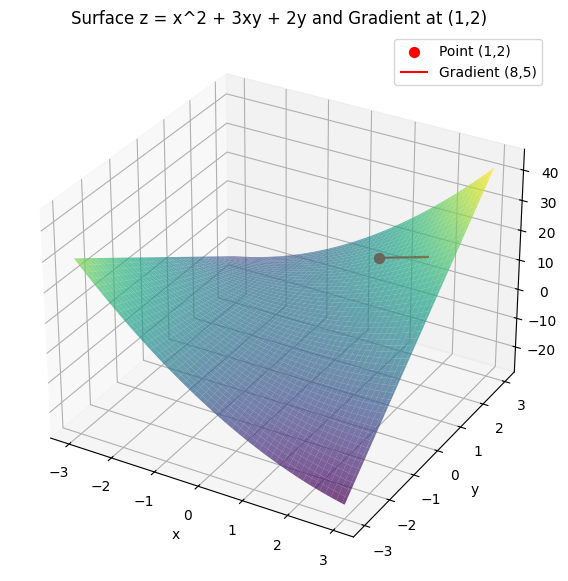

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + 3*X*Y + 2*Y

# Compute partial derivatives at each point
dZ_dx = 2*X + 3*Y
dZ_dy = 3*X + 2

# Specific point
x0, y0 = 1, 2
z0 = x0**2 + 3*x0*y0 + 2*y0
grad_x = 2*x0 + 3*y0
grad_y = 3*x0 + 2

# Plot surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot the specific point
ax.scatter(x0, y0, z0, color='r', s=50, label='Point (1,2)')

# Plot gradient arrow
ax.quiver(x0, y0, z0, grad_x, grad_y, 0, color='r', length=1, normalize=True, label='Gradient (8,5)')

# Labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface z = x^2 + 3xy + 2y and Gradient at (1,2)')
ax.legend()

plt.show()
